In [ ]:
#Use to import pandas
import pandas as pd
#Use to import the file into google Colab drive
from google.colab import files 
#Use to import io, which opens the file from the Colab drive
import io

In [ ]:
# This will open a widget when run that will enable you to browse the files on your local storage drive.
uploaded = files.upload()

Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [ ]:
# Now use the below code to read the csv in pandas' dataframe
df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
X_test_f = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

In [ ]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


In [ ]:
df['Attrition'].value_counts()

0    843
1    785
Name: Attrition, dtype: int64

In [ ]:
X = df[['Attrition','Age','DistanceFromHome','OverTime','Education','MaritalStatus','NumCompaniesWorked','MonthlyIncome','TotalWorkingYears']]

In [ ]:
X['Age']= np.log(X['Age'])
X['MonthlyIncome']= np.log(X['MonthlyIncome'])
X['DistanceFromHome']= np.log(X['DistanceFromHome'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
X.head()

,Attrition,Age,DistanceFromHome,OverTime,Education,MaritalStatus,NumCompaniesWorked,MonthlyIncome,TotalWorkingYears
0,0,3.401197,0.693147,No,3,Single,0,7.849324,12
1,0,3.583519,2.484907,Yes,4,Married,9,8.447414,7
2,1,4.007333,0.693147,No,1,Single,4,8.548692,12
3,0,3.663562,3.178054,No,1,Single,7,8.320692,18
4,0,3.610918,1.098612,No,3,Married,1,9.152075,10


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_test_f = X_test_f[['Age','DistanceFromHome','OverTime','Education','MaritalStatus','NumCompaniesWorked','MonthlyIncome','TotalWorkingYears']]

In [ ]:
X_test_f['Age']= np.log(X_test_f['Age'])
X_test_f['MonthlyIncome']= np.log(X_test_f['MonthlyIncome'])
X_test_f['DistanceFromHome']= np.log(X_test_f['DistanceFromHome'])

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [ ]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in X.columns[1:]:
    if X[col].dtype == 'object':
        if len(list(X[col].unique())) <= 2:
            le.fit(X[col])
            X[col] = le.transform(X[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in X_test_f.columns[1:]:
    if X_test_f[col].dtype == 'object':
        if len(list(X_test_f[col].unique())) <= 2:
            le.fit(X_test_f[col])
            X_test_f[col] = le.transform(X_test_f[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


In [ ]:
X.dtypes

Attrition               int64
Age                   float64
DistanceFromHome      float64
OverTime                int64
Education               int64
MaritalStatus          object
NumCompaniesWorked      int64
MonthlyIncome         float64
TotalWorkingYears       int64
dtype: object

In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes
X_majority = X[X.Attrition==0]
X_minority = X[X.Attrition==1]
# Upsample minority class
X_minority_upsampled = resample(X_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(X_majority),    # to match majority class
                                 random_state=123) # reproducible results
# Combine majority class with upsampled minority class
X_upsampled = pd.concat([X_majority, X_minority_upsampled])
X_upsampled = X_upsampled.sample(frac=1)
X_upsampled.index = range(len(X_upsampled))
# Display new class counts
X_upsampled.Attrition.value_counts()

1    843
0    843
Name: Attrition, dtype: int64

In [ ]:
type(X_upsampled)

pandas.core.frame.DataFrame

In [ ]:
X_upsampled.head()

,Attrition,Age,DistanceFromHome,OverTime,Education,MaritalStatus,NumCompaniesWorked,MonthlyIncome,TotalWorkingYears
0,1,3.218876,1.609438,1,3,Single,1,8.655911,6
1,1,3.465736,1.386294,0,4,Married,1,9.249561,14
2,0,3.295837,0.693147,0,3,Single,2,7.855545,6
3,0,3.663562,2.302585,1,1,Married,1,9.744961,21
4,0,3.806662,3.135494,1,2,Married,1,8.197814,9


In [ ]:
# convert rest of categorical variable into dummy
X_upsampled = pd.get_dummies(X_upsampled, drop_first=True)

In [ ]:
X_test_f = pd.get_dummies(X_test_f, drop_first=True)

In [ ]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
X_col = list(X_upsampled.columns)
X_col.remove('Attrition')
for col in X_col:
    X_upsampled[col] = X_upsampled[col].astype(float)
    X_upsampled[[col]] = scaler.fit_transform(X_upsampled[[col]])
X_upsampled['Attrition'] = pd.to_numeric(X_upsampled['Attrition'], downcast='float')
X_upsampled.head()

,Attrition,Age,DistanceFromHome,OverTime,Education,NumCompaniesWorked,MonthlyIncome,TotalWorkingYears,MaritalStatus_Married,MaritalStatus_Single
0,1.0,1.364250,2.389808,5.0,2.50,0.555556,2.911546,0.789474,0.0,5.0
1,1.0,2.389440,2.058468,0.0,3.75,0.555556,3.905361,1.842105,5.0,0.0
2,0.0,1.683863,1.029234,0.0,2.50,1.111111,1.571672,0.789474,0.0,5.0
3,0.0,3.210994,3.419042,5.0,0.00,0.555556,4.734698,2.763158,5.0,0.0
4,0.0,3.805280,4.655805,5.0,1.25,0.555556,2.144657,1.184211,5.0,0.0


In [ ]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
X_test_col = list(X_test_f.columns)
for col in X_test_col:
    X_test_f[col] = X_test_f[col].astype(float)
    X_test_f[[col]] = scaler.fit_transform(X_test_f[[col]])

X_test_f.head()

,Age,DistanceFromHome,OverTime,Education,NumCompaniesWorked,MonthlyIncome,TotalWorkingYears,MaritalStatus_Married,MaritalStatus_Single
0,1.834895,3.262595,0.0,2.50,0.555556,1.102033,0.625,5.0,0.0
1,2.257590,2.660532,0.0,3.75,2.222222,2.770946,1.625,0.0,0.0
2,2.992369,2.660532,5.0,2.50,2.222222,2.925755,1.625,0.0,0.0
3,3.518758,0.000000,5.0,1.25,5.000000,2.950917,1.000,5.0,0.0
4,3.805280,2.058468,0.0,1.25,0.555556,2.417825,1.125,5.0,0.0


In [ ]:
y = X_upsampled['Attrition']
X = X_upsampled.drop(columns='Attrition')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=7)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1264, 9)
Number transactions y_train dataset:  (1264,)
Number transactions X_test dataset:  (422, 9)
Number transactions y_test dataset:  (422,)


In [ ]:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('XG',XGBClassifier()))

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,99.18,0.81,94.78,2.77
6,XG,91.02,2.58,84.50,3.07
4,Decision Tree Classifier,90.56,2.26,90.66,2.26
2,SVM,88.76,3.00,81.48,3.84
3,KNN,87.74,3.60,80.77,3.68
0,Logistic Regression,77.55,3.94,71.20,3.45
5,Gaussian NB,74.95,3.15,65.98,2.18


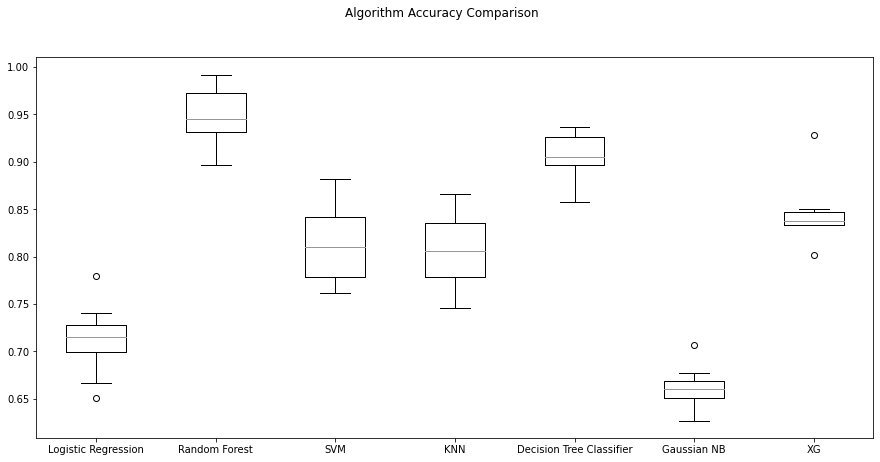

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
final_model = RandomForestClassifier(n_estimators=100, random_state=7)

In [ ]:
final_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [ ]:
y_preds = final_model.predict_proba(X_test_f)

In [ ]:
y_preds

array([[0.96, 0.04],
       [0.82, 0.18],
       [0.9 , 0.1 ],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.45, 0.55],
       [0.37, 0.63],
       [0.79, 0.21],
       [0.58, 0.42],
       [0.77, 0.23],
       [0.98, 0.02],
       [0.73, 0.27],
       [0.97, 0.03],
       [0.93, 0.07],
       [0.97, 0.03],
       [0.78, 0.22],
       [0.92, 0.08],
       [0.91, 0.09],
       [0.87, 0.13],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.38, 0.62],
       [0.69, 0.31],
       [0.96, 0.04],
       [0.78, 0.22],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.78, 0.22],
       [0.06, 0.94],
       [0.98, 0.02],
       [0.69, 0.31],
       [0.96, 0.04],
       [0.65, 0.35],
       [0.6 , 0.4 ],
       [0.97, 0.03],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.9 , 0.1 ],
       [0.75, 0.25],
       [0.86, 0.14],
       [0.12, 0.88],
       [0.84, 0.16],
       [0.97, 0.03],
       [0.91, 0.09],
       [0.99, 0.01],
       [0.86, 0.14],
       [0.46, 0.54],
       [0.51,

In [ ]:
type(y_preds)

numpy.ndarray

In [ ]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

X = X
Y = y
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = RandomForestClassifier()
estimators.append(('RF', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))


# create the ensemble model
ensemble = VotingClassifier(estimators, voting = 'soft')
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ValueError: ignored

In [ ]:
ensemble.fit(X,y)
y_preds_ensemble = ensemble.predict_proba(X_test_f)

In [ ]:
y_preds_ensemble

array([[0.91159882, 0.08840119],
       [0.92193927, 0.07806073],
       [0.91817235, 0.08182764],
       [0.59080613, 0.40919387],
       [0.9301889 , 0.06981109],
       [0.56047785, 0.43952215],
       [0.46374445, 0.53625555],
       [0.6475535 , 0.3524465 ],
       [0.60150663, 0.39849337],
       [0.76041949, 0.2395805 ],
       [0.97944529, 0.02055471],
       [0.75568465, 0.24431536],
       [0.95027271, 0.04972729],
       [0.85732061, 0.14267938],
       [0.80499515, 0.19500484],
       [0.8131911 , 0.18680889],
       [0.97130967, 0.02869033],
       [0.91783899, 0.082161  ],
       [0.66612118, 0.33387881],
       [0.92206858, 0.07793143],
       [0.98196423, 0.01803577],
       [0.44930746, 0.55069254],
       [0.90938403, 0.09061597],
       [0.97176296, 0.02823705],
       [0.74591861, 0.25408139],
       [0.98079821, 0.01920179],
       [0.9564106 , 0.0435894 ],
       [0.75134916, 0.24865083],
       [0.01629751, 0.98370249],
       [0.9600484 , 0.03995159],
       [0.